In [3]:
%cd ..

/Users/michaelbarrientos/Desktop/ev_battery_health_forecast


In [4]:
from src.cleaning import load_and_clean

(2769, 6)


,timestamp,Capacity,SOH,ambient_temperature,battery_id,test_id
0,2010-07-21 15:00:35,1.674305,63.417052,4,B0047,0
4,2010-07-21 21:02:56,1.524366,57.737883,4,B0047,4
6,2010-07-22 01:40:06,1.508076,57.120876,4,B0047,6
8,2010-07-22 06:16:21,1.483558,56.192197,4,B0047,8
10,2010-07-22 10:51:48,1.467139,55.570314,4,B0047,10


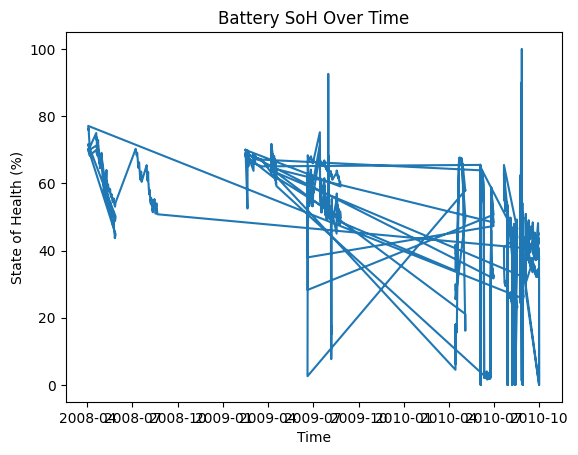

In [5]:
from src.cleaning import load_and_clean
import matplotlib.pyplot as plt 

df = load_and_clean('data/raw/ev_metrics.csv')
print(df.shape)
display(df.head())

plt.plot(df['timestamp'], df ['SOH'])
plt.xlabel('Time')
plt.ylabel('State of Health (%)')
plt.title('Battery SoH Over Time')
plt.show()